<a href="https://colab.research.google.com/github/ryonce/Daily-Projects/blob/main/DBSCAN_and_Agglomerative_Clustering_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

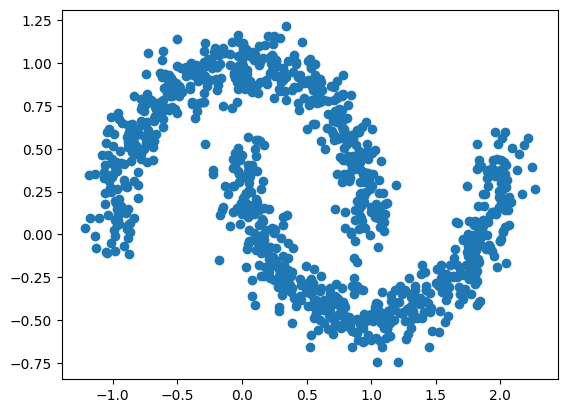

In [3]:
# Created the moons

from sklearn.datasets import make_moons
moons = make_moons(n_samples = 1000,                   noise=.1,                   random_state=42)[0]
plt.scatter(moons[:,0], moons[:,1])

In [4]:
# Instantiate Standard Scaler

scaler = StandardScaler()

# Fit & transform data.

moon_fit = scaler.fit_transform(moons)

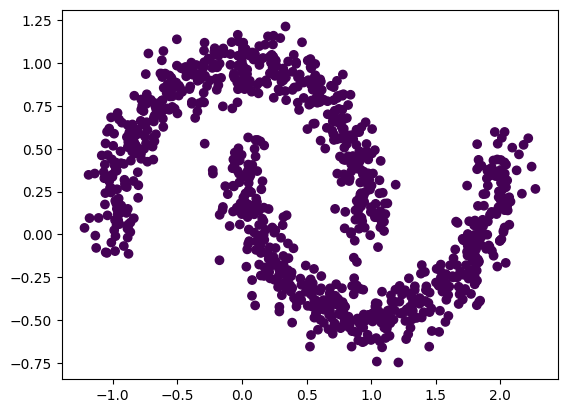

In [5]:
# Fit on DBSCAN

db = DBSCAN()
db.fit(moons)
plt.scatter(moons[:,0], moons[:, 1], c=db.labels_);

In [6]:
# Create the nearest neighbors and find them

min_samples = 20
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(moons)
distances, indices = neighbors.kneighbors(moons)
distances[:5]

array([[0.        , 0.0169689 , 0.03320547, 0.03571159, 0.04090796,
        0.05256796, 0.06196139, 0.06283235, 0.07497139, 0.09412639,
        0.10615668, 0.12016565, 0.12446092, 0.13443247, 0.13650866,
        0.14311466, 0.15393535, 0.15654712, 0.15675518, 0.15678159],
       [0.        , 0.01992972, 0.02442595, 0.03653081, 0.0432819 ,
        0.05071889, 0.06128177, 0.06866597, 0.06980505, 0.07335879,
        0.08968879, 0.09855972, 0.10054963, 0.10101019, 0.10350026,
        0.10358397, 0.11096583, 0.1175126 , 0.12078347, 0.12362918],
       [0.        , 0.04711226, 0.04825653, 0.07902221, 0.09369886,
        0.09715531, 0.09734895, 0.11107343, 0.1197102 , 0.14340495,
        0.16567716, 0.17333307, 0.17599576, 0.17635196, 0.17855411,
        0.18031931, 0.19283723, 0.19537365, 0.19592822, 0.20430875],
       [0.        , 0.02678999, 0.09673046, 0.11850927, 0.13571628,
        0.13786754, 0.14094572, 0.14290831, 0.14560769, 0.14606385,
        0.15919813, 0.16594649, 0.16975415, 0

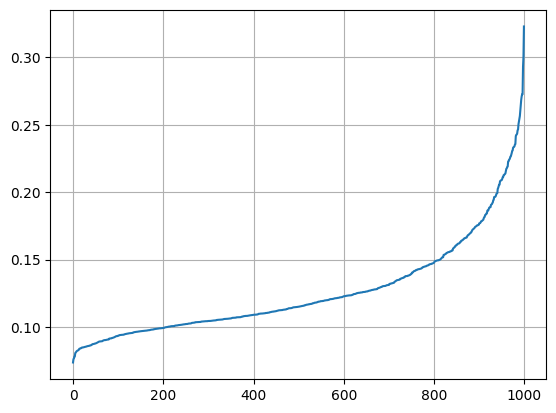

In [7]:
# Sort the distances and plot them

sorted_distances = np.sort(distances[:, min_samples-1])

plt.plot(sorted_distances)
plt.grid();


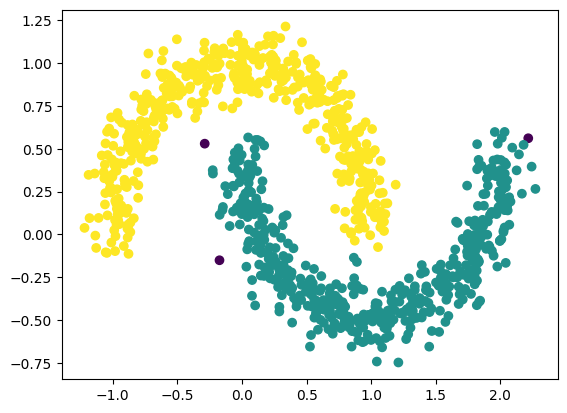

In [21]:
# Instantiate & fit clustering - this is done in one step for DBSCAN

dbs = DBSCAN(eps = 0.18, min_samples = min_samples).fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=dbs.labels_);

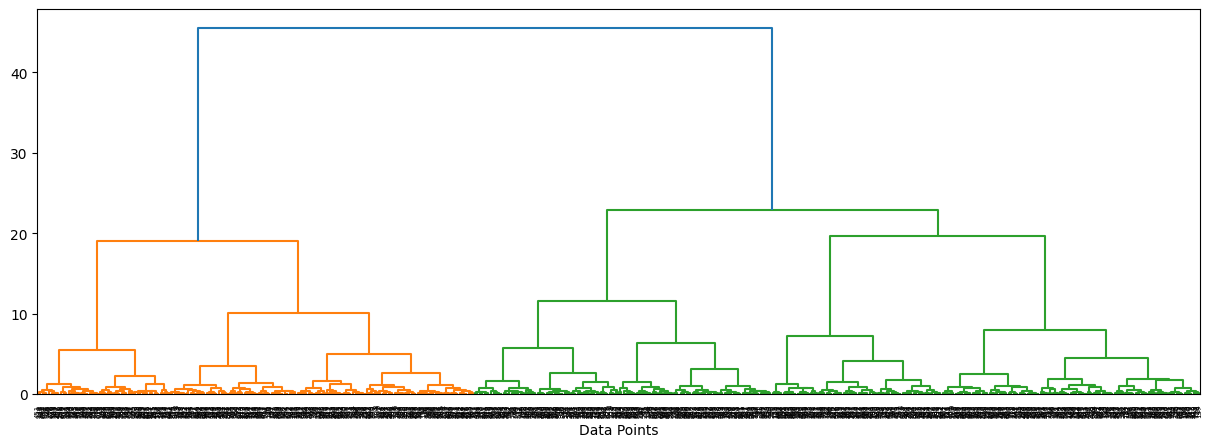

In [13]:
# Visualize Dendogram

plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(moon_fit, method = 'ward'))
plt.xlabel('Data Points');

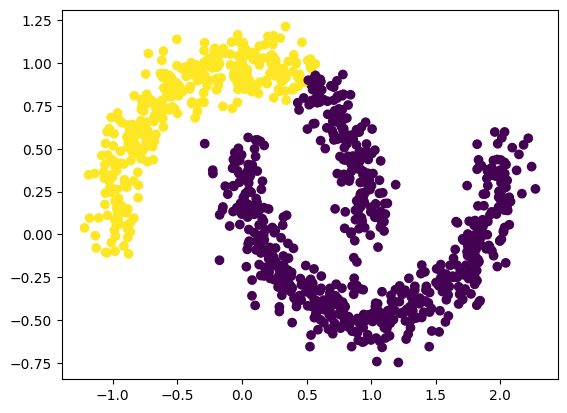

In [18]:
# Fit with the the clusters chosen, 2

agg = AgglomerativeClustering(n_clusters=2)
agg.fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=agg.labels_);